## Case Study 2: Customer Churn Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("casestudy.csv", index_col=0)

data.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


We assume that revenue is in USD for further calculations

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685927 entries, 0 to 685926
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   customer_email  685927 non-null  object 
 1   net_revenue     685927 non-null  float64
 2   year            685927 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 20.9+ MB


**1. Total Revenue per year:**

In [4]:
total_revenue = data.groupby(by="year").sum()
total_revenue.reset_index()

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


We format the total revenue in Million USD for better readability as shown below

In [5]:
total_rev_M = round(total_revenue/1e6, 2)
total_rev_M.columns=["net_revenue ($M)"]
total_rev_M.reset_index()

,year,net_revenue ($M)
0,2015,29.04
1,2016,25.73
2,2017,31.42


**2. New Customer Revenue e.g. new customers not present in previous year only**

In [6]:
customer_year_pivot = data.pivot(index="customer_email", columns="year")
customer_year_pivot.columns = customer_year_pivot.columns.get_level_values(1).to_list()
customer_year_pivot = customer_year_pivot.reset_index()
customer_year_pivot.head()

,customer_email,2015,2016,2017
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN
1,aaagldjgdt@gmail.com,44.72,NaN,NaN
2,aaaglfuvti@gmail.com,NaN,160.79,NaN
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN
4,aaaiekepot@gmail.com,NaN,NaN,43.68


In [7]:
new_customers = customer_year_pivot.copy()
new_customers.loc[(new_customers[2015].notna()) & (new_customers[2016].notna()),[2016, 2017]] = np.NaN
new_customers.loc[(new_customers[2016].notna()) & (new_customers[2017].notna()),[2017]] = np.NaN

new_customers.head()

,customer_email,2015,2016,2017
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN
1,aaagldjgdt@gmail.com,44.72,NaN,NaN
2,aaaglfuvti@gmail.com,NaN,160.79,NaN
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN
4,aaaiekepot@gmail.com,NaN,NaN,43.68


Yearly revenue due to new customers is given below:

In [8]:
new_cust_rev = new_customers.sum(numeric_only=True, skipna=True, axis=0).to_frame(name="Revenue")
new_cust_rev

,Revenue
2015,29036749.19
2016,18245491.01
2017,28776235.04


We convert it to Million USD for better readability.

In [9]:
new_cust_rev_M = round(new_cust_rev/1e6, 2)
new_cust_rev_M.columns = ["Revenue ($M)"]
new_cust_rev_M

,Revenue ($M)
2015,29.04
2016,18.25
2017,28.78


**3. Existing Customer Growth**

To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [10]:
customer_year_pivot["growth_rev_15_16"] = np.where(customer_year_pivot[2015].notna() & 
                                              customer_year_pivot[2016].notna(), 
                                               customer_year_pivot[2016]-customer_year_pivot[2015], np.NaN)

customer_year_pivot["growth_rev_16_17"] = np.where(customer_year_pivot[2016].notna() & 
                                              customer_year_pivot[2017].notna(), 
                                              customer_year_pivot[2017]-customer_year_pivot[2016], np.NaN)
customer_year_pivot.head()

,customer_email,2015,2016,2017,growth_rev_15_16,growth_rev_16_17
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN,NaN,NaN
1,aaagldjgdt@gmail.com,44.72,NaN,NaN,NaN,NaN
2,aaaglfuvti@gmail.com,NaN,160.79,NaN,NaN,NaN
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN,NaN,NaN
4,aaaiekepot@gmail.com,NaN,NaN,43.68,NaN,NaN


In [11]:
rev_growth = customer_year_pivot[["growth_rev_15_16", "growth_rev_16_17"]].sum().to_frame(name="Revenue")
rev_growth

,Revenue
growth_rev_15_16,20335.46
growth_rev_16_17,20611.34


Total revenue growth of existing customers is given below in $M:

In [12]:
rev_growth_M = round(rev_growth.sum(numeric_only=True, axis=1)/1e6, 2).to_frame(name="revenue ($M)")
rev_growth_M

,revenue ($M)
growth_rev_15_16,0.02
growth_rev_16_17,0.02


**4. Revenue lost from attrition/Churn**

In [13]:
customer_year_pivot["lost_rev_2016"] = np.where(customer_year_pivot[2015].notna() &
                                                customer_year_pivot[2016].isna(), 
                                                customer_year_pivot[2015], np.NaN)

customer_year_pivot["lost_rev_2017"] = np.where(customer_year_pivot[2016].notna() &
                                                customer_year_pivot[2017].isna(), 
                                                customer_year_pivot[2016], np.NaN)

customer_year_pivot.head()

,customer_email,2015,2016,2017,growth_rev_15_16,growth_rev_16_17,lost_rev_2016,lost_rev_2017
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN,NaN,NaN,NaN,127.62
1,aaagldjgdt@gmail.com,44.72,NaN,NaN,NaN,NaN,44.72,NaN
2,aaaglfuvti@gmail.com,NaN,160.79,NaN,NaN,NaN,NaN,160.79
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN,NaN,NaN,49.20,NaN
4,aaaiekepot@gmail.com,NaN,NaN,43.68,NaN,NaN,NaN,NaN


In [14]:
attr_rev_lost = customer_year_pivot[["lost_rev_2016", "lost_rev_2017"]].sum().to_frame(name="Revenue")
attr_rev_lost

,Revenue
lost_rev_2016,21571632.07
lost_rev_2017,23110294.94


Total revenue lost due to attrition is given below in $M:

In [15]:
attrition_loss_M = round(attr_rev_lost.sum(axis=1)/1e6, 2).to_frame(name="Revenue ($M)")
attrition_loss_M

,Revenue ($M)
lost_rev_2016,21.57
lost_rev_2017,23.11


**5. Existing Customer Revenue Current Year**

We assume existing customers to be ones that are present in current year and at least previous year.
Hence, we calculate this for the years 2016 and 2017 only. 

Note: For customer in all 3 years, we consider both cases:
1. Current year = 2016, Prior year = 2015
2. Current year = 2017, Prior year = 2016

In [16]:
customer_year_pivot["exist_curr_rev_2016"] = np.where(customer_year_pivot["growth_rev_15_16"].notna(),
                                                customer_year_pivot[2016], np.NaN)

customer_year_pivot["exist_curr_rev_2017"] = np.where(customer_year_pivot["growth_rev_16_17"].notna(),
                                                customer_year_pivot[2017], np.NaN)

customer_year_pivot.head()

,customer_email,2015,2016,2017,growth_rev_15_16,growth_rev_16_17,lost_rev_2016,lost_rev_2017,exist_curr_rev_2016,exist_curr_rev_2017
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN,NaN,NaN,NaN,127.62,NaN,NaN
1,aaagldjgdt@gmail.com,44.72,NaN,NaN,NaN,NaN,44.72,NaN,NaN,NaN
2,aaaglfuvti@gmail.com,NaN,160.79,NaN,NaN,NaN,NaN,160.79,NaN,NaN
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN,NaN,NaN,49.20,NaN,NaN,NaN
4,aaaiekepot@gmail.com,NaN,NaN,43.68,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
existing_curr_cust = customer_year_pivot[["exist_curr_rev_2016", "exist_curr_rev_2017"]].sum().to_frame("Revenue")
existing_curr_cust

,Revenue
exist_curr_rev_2016,7485452.58
exist_curr_rev_2017,2641259.99


Total existing customer revenue is given below in $M:

In [18]:
curr_cust_rev = round(existing_curr_cust.sum(axis=1)/1e6, 2).to_frame(name="Revenue ($M)")
curr_cust_rev

,Revenue ($M)
exist_curr_rev_2016,7.49
exist_curr_rev_2017,2.64


**6. Existing Customer Revenue Prior Year**

In [19]:
customer_year_pivot["exist_prior_rev_2016"] = np.where(customer_year_pivot["growth_rev_15_16"].notna(),
                                                customer_year_pivot[2015], np.NaN)

customer_year_pivot["exist_prior_rev_2017"] = np.where(customer_year_pivot["growth_rev_16_17"].notna(),
                                                customer_year_pivot[2016], np.NaN)

customer_year_pivot.head()

,customer_email,2015,2016,2017,growth_rev_15_16,growth_rev_16_17,lost_rev_2016,lost_rev_2017,exist_curr_rev_2016,exist_curr_rev_2017,exist_prior_rev_2016,exist_prior_rev_2017
0,aaafxtkgxo@gmail.com,NaN,127.62,NaN,NaN,NaN,NaN,127.62,NaN,NaN,NaN,NaN
1,aaagldjgdt@gmail.com,44.72,NaN,NaN,NaN,NaN,44.72,NaN,NaN,NaN,NaN,NaN
2,aaaglfuvti@gmail.com,NaN,160.79,NaN,NaN,NaN,NaN,160.79,NaN,NaN,NaN,NaN
3,aaaicvtnzx@gmail.com,49.20,NaN,NaN,NaN,NaN,49.20,NaN,NaN,NaN,NaN,NaN
4,aaaiekepot@gmail.com,NaN,NaN,43.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
existing_prior_cust = customer_year_pivot[["exist_prior_rev_2016", "exist_prior_rev_2017"]].sum().to_frame("Revenue")
existing_prior_cust

,Revenue
exist_prior_rev_2016,7465117.12
exist_prior_rev_2017,2620648.65


Total prior customer revenue is given below in $M:

In [21]:
prior_cust_rev = round(existing_prior_cust.sum(axis=1)/1e6, 2).to_frame(name="Revenue ($M)")
prior_cust_rev

,Revenue ($M)
exist_prior_rev_2016,7.47
exist_prior_rev_2017,2.62


**7. Total Customers Current Year**

Total existing customers in current year:

In [22]:
total_exist_curr_cust = customer_year_pivot[["exist_curr_rev_2016", "exist_curr_rev_2017"]].count().to_frame(name="Customers")
total_exist_curr_cust

,Customers
exist_curr_rev_2016,59584
exist_curr_rev_2017,20959


Total customers in current year:

In [23]:
total_curr_cust = customer_year_pivot[[2016, 2017]].count().to_frame(name="Customers")
total_curr_cust

,Customers
2016,204646
2017,249987


**8. Total Customers Previous Year**

Total existing customers in previous year:

In [24]:
total_exist_prior_cust = customer_year_pivot[["exist_prior_rev_2016", "exist_prior_rev_2017"]].count().to_frame(name="Customers")
total_exist_prior_cust

,Customers
exist_prior_rev_2016,59584
exist_prior_rev_2017,20959


Total customers in previous year:

In [25]:
total_prior_cust = customer_year_pivot[[2015, 2016]].count().to_frame(name="Customers")
total_prior_cust

,Customers
2015,231294
2016,204646


**9. New Customers**

In [26]:
total_new_customers = new_customers[[2015, 2016, 2017]].count().to_frame(name="New Customers")
total_new_customers

,New Customers
2015,231294
2016,145062
2017,229028


We show total new customers per year in million below:

In [27]:
new_cust_M = round(total_new_customers/1e6, 2)
new_cust_M.columns = ["New Customers (in Millions)"]
new_cust_M

,New Customers (in Millions)
2015,0.23
2016,0.15
2017,0.23


**10. Lost Customers**

In [28]:
lost_cust = customer_year_pivot[["lost_rev_2016", "lost_rev_2017"]].count().to_frame("Customers")
lost_cust.index = ["lost_2016", "lost_2017"]
lost_cust

,Customers
lost_2016,171710
lost_2017,183687


We show lost customers in millions below:

In [29]:
lost_cust_M = round(lost_cust/1e6, 2)
lost_cust_M.columns = ["Lost Customers (in millions)"]
lost_cust_M

,Lost Customers (in millions)
lost_2016,0.17
lost_2017,0.18


**11. Metrics**

We look at the following metrics for our analysis:

* Total Yearly Revenue
* Total Customers
* YoY Attrition Rate

        Attrition Rate = Customers Lost Current Year/((Total Customer Previous Year + Total Customer Current Year)/2) * 100
        

* YoY Customer Growth Rate

        Customer Growth Rate = New Customers Added/Total Customer Previous Year * 100    
    

* YoY Existing Customer Revenue Churn Rate

        Existing Customer Revenue Churn Rate = (Total Revenue Previous Year Existing Customer-Total Revenue Current Year Existing Customer)/Total Revenue Previous Year Existing Customer * 100
    

* YoY New Customer Revenue Growth Rate

        New Customer Revenue Growth Rate = (Total Revenue Current Year New Customer)/Total Revenue Current Year New Customer * 100
        


**Total Yearly Revenue**

In [30]:
total_rev = total_revenue[1:]
total_rev.columns = ["Total Revenue"]
total_rev

,Total Revenue
year,
2016,25730943.59
2017,31417495.03


**Total Customers**

In [31]:
total_cust = customer_year_pivot[[2015, 2016, 2017]].count().to_frame(name="Total Customers")
total_cust

,Total Customers
2015,231294
2016,204646
2017,249987


**YoY Attrition Rate**

In [32]:
attrition_rate = pd.DataFrame(round((lost_cust/((total_prior_cust.values + total_curr_cust.values)/2)) * 100, 2))
attrition_rate.columns = ["Attrition Rate"]
attrition_rate.index = [2016, 2017]
attrition_rate

,Attrition Rate
2016,78.78
2017,80.81


**YoY Customer Growth Rate**

In [33]:
cust_growth_rate = round(total_new_customers[1:]/total_prior_cust.values * 100,2)
cust_growth_rate.columns = ["Customer Growth Rate"]
cust_growth_rate

,Customer Growth Rate
2016,62.72
2017,111.91


**YoY Existing Customer Revenue Churn Rate**

In [34]:
attrition_reve_loss = attr_rev_lost
attrition_reve_loss.columns = ["Lost Revenue"]
attrition_reve_loss.index = [2016, 2017]
attrition_reve_loss

,Lost Revenue
2016,21571632.07
2017,23110294.94


In [35]:
total_revenue.columns = ["Revenue"]
total_revenue

,Revenue
year,
2015,29036749.19
2016,25730943.59
2017,31417495.03


In [36]:
existing_rev_churn = round(attrition_reve_loss/total_revenue.values[:2] * 100, 2)
existing_rev_churn.columns = ["Revenue Churn"]
existing_rev_churn

,Revenue Churn
2016,74.29
2017,89.82


**YoY New Customer Revenue Growth Rate**

In [37]:
revenue_growth = round(new_cust_rev[1:]/total_revenue[1:].values * 100, 2)
revenue_growth.columns = ["Revenue Growth Rate"]
revenue_growth

,Revenue Growth Rate
2016,70.91
2017,91.59


**12. Visualizations**

**Yearly Revenue and #Customers**

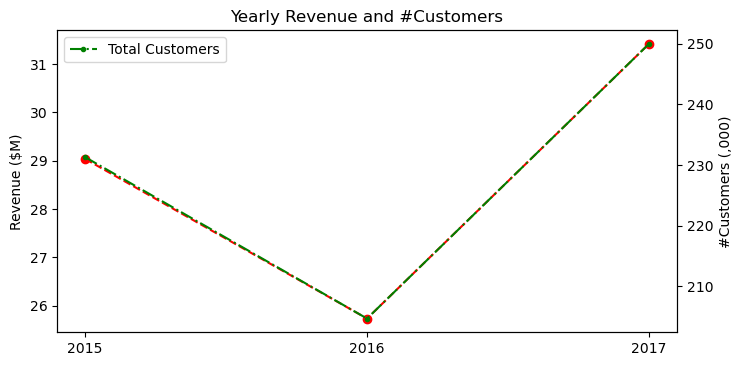

In [38]:
total_revenue_M = total_revenue/1e6
total_cust_1e3 = total_cust/1e3

fig, ax = plt.subplots(figsize=(8, 4), dpi=100)

ax.plot(total_revenue_M, 'or--', label="Total Revenue")
ax.set_ylabel("Revenue ($M)")

ax2 = ax.twinx()

ax2.plot(total_cust_1e3, '-..g', label="Total Customers")
ax2.set_ylabel('#Customers (,000)')

plt.title('Yearly Revenue and #Customers')
plt.xticks(total_revenue_M.index)
plt.xlabel('Year')
plt.legend()

*The total revenue and number of customers are fluctuating by the same proportion each year*

Thus, it may seem that any revenue lost/gained is due to corresponding customers lost/gained. To evaluate this, we look rate of attrition and new customer growth, and revenue fluctuations due to each

**Loss/Gain of Customers (Attrition Rate vs New Customer Growth Rate)**

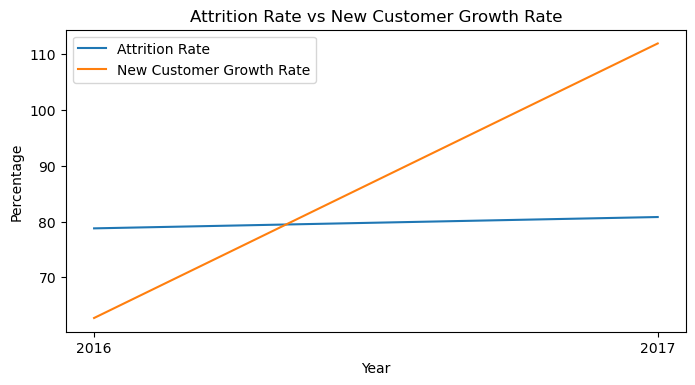

In [39]:
plt.figure(figsize=(8, 4), dpi=100)

attrition_rate["Attrition Rate"].plot(label="Attrition Rate")
cust_growth_rate["Customer Growth Rate"].plot(label="New Customer Growth Rate")

plt.title('Attrition Rate vs New Customer Growth Rate')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(attrition_rate.index)
plt.legend()

*Thus, we see that we have lost customers are fairly similar rates in 2016 and 2017, but have gained significantly more customers in 2017*

**Revenue Fluctuations in Existing vs New Customers**

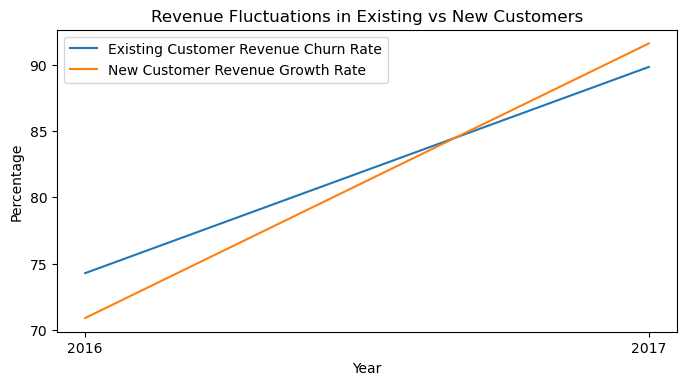

In [40]:
plt.figure(figsize=(8, 4), dpi=100)

existing_rev_churn["Revenue Churn"].plot(label='Existing Customer Revenue Churn Rate')
revenue_growth['Revenue Growth Rate'].plot(label='New Customer Revenue Growth Rate')

plt.title('Revenue Fluctuations in Existing vs New Customers')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.xticks(existing_rev_churn.index)
plt.legend()

*Thus, we see that the revenue fluctuations are similar between existing and new customers over the years, but more revenue is generated from existing customers in 2016 than 2017*

**13. Conclusion**

    The total revenue and number of customers are fluctuating by the same proportion each year. 

    But the cause for loss of revenue in 2016 cannot be attributed solely to attrition. It is also because the revenue generated from new customers is less than that lost from attrition.

    We see some improvement in 2017. There are more new customers, and more revenue is generated from them, although the attrition rate is still the same. Hence, we see an overall increase in revenue in 2017.